# Predict heart disease using Machine Learning

this notebook looks into using various Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease.

We are going to take the following steps:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. [click here](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

## 3. Evaluation

> if we can reach an accuracy greater than 0.9, we'll pursue the project.

## 4. Features

What features that we will use ?
This is where we different information about our dataset

**Create a data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   - serum = LDL + HDL + .2 \* triglycerides
   - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools


In [2]:
# Regular EDA(exploratory data analysis) and plotting library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Model from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score


### Load data


In [4]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

### Exploratory Data Analysis

We can learn more about our dataset by visualizing the relationship between features and label.

1. What kind of data do we have and how to treat different types?
2. What is missing from the data and how to deal with it?
3. Where are the outliers and why should we care about them?
4. How can we add, change or remove features to get more out of our data?


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

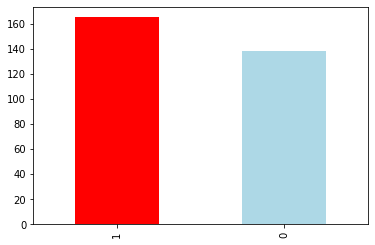

In [8]:
df['target'].value_counts().plot(
    kind='bar',
    color=["red", "lightblue"],
)


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Amount')

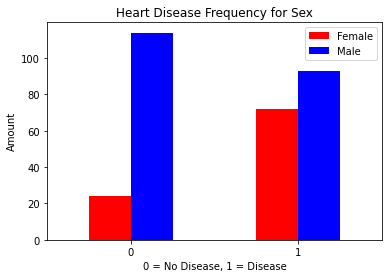

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["red", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female", "Male"])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.xticks(rotation=0)
plt.ylabel("Amount")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

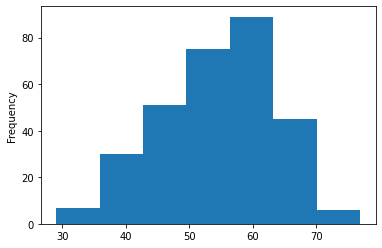

In [16]:
df.age.plot(kind="hist", bins=7)

### Age and Max heart rate for heart disease


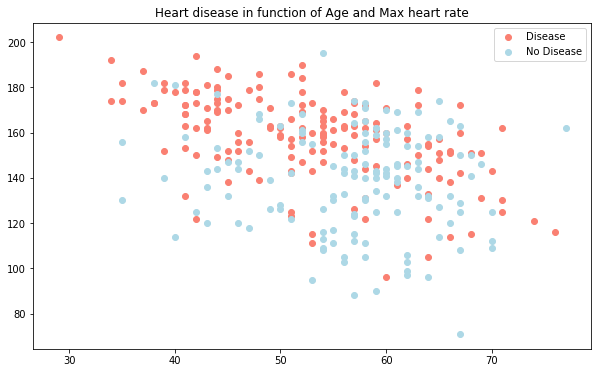

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c='salmon')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c='lightblue')

plt.title("Heart disease in function of Age and Max heart rate")
plt.legend(["Disease", "No Disease"])
plt.show()

### Heart Disease Frequency per Chest Pain Type


Text(0.5, 0, 'Chest pain type')

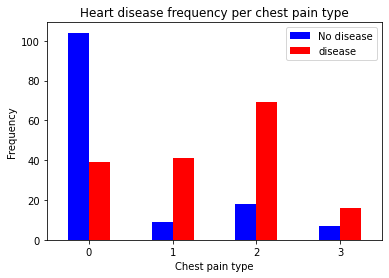

In [18]:
pd.crosstab(df.cp, df.target).plot.bar(color=["b", 'r'])
plt.title("Heart disease frequency per chest pain type")
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.xlabel("Chest pain type")

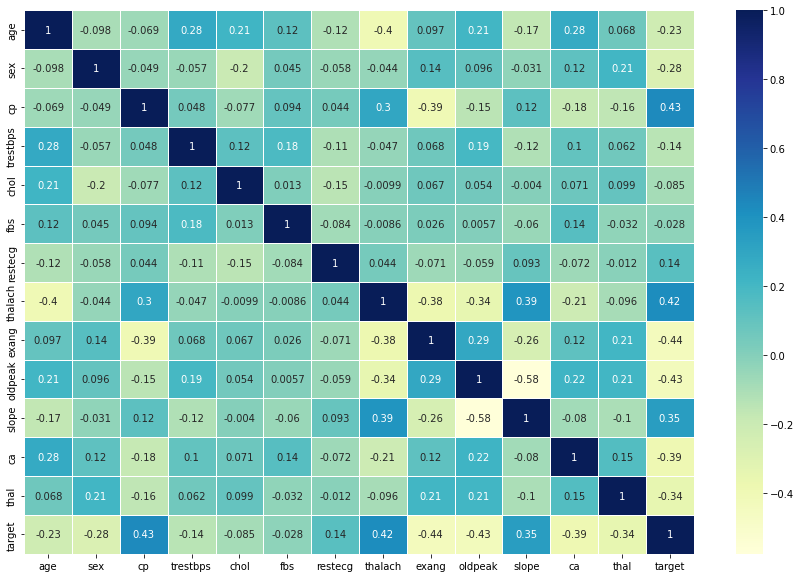

In [19]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10)) 
ax = sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)

## 5. Model

In [130]:
y= df.target
X = df.drop(["target"], axis=1)

np.random.seed(42)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

We will train 3 different models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

C:\Users\duong\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

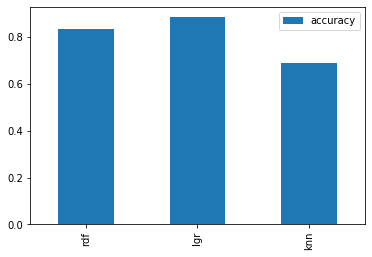

In [21]:
models = {
    "rdf": RandomForestClassifier(),
    "lgr": LogisticRegression(max_iter=100),
    "knn": KNeighborsClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    """[Evaluate given machine learning models]

    Args:
        models ([List of scikitlearn model]): [Scikitlearn model]
        X_train ([numpy array]): [Training feature]
        y_train ([type]): [training label]
        X_test ([type]): [testing features]
        y_test ([type]): [testing label]
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)
### Model comparison

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()


## 6. Evaluation

1. Hyperparameter turning
2. Feature important
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC curve
10. Area under the curve(AUC)

### Hyperparameter turning

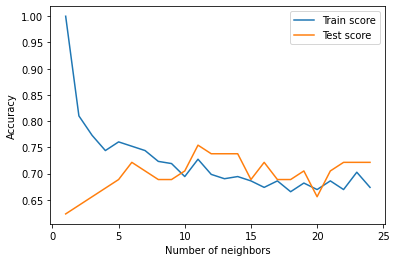

In [22]:
# KNN
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
for i in range(1,25):
    knn.set_params(n_neighbors =i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(range(1,25),train_scores)
plt.plot(range(1,25),test_scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend(['Train score', 'Test score'])
 

### Hyperparameter turning with RandomizedSearchCV



In [23]:
log_regression_grid = {"C": np.logspace(-4, 4, 20), "solver": ['liblinear']}

rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3,  10],
    "min_samples_split": np.arange(2, 20, 4),
    "min_samples_leaf": np.arange(1, 20, 4)
}


In [24]:
np.random.seed(42)

lr_searchCV = RandomizedSearchCV(LogisticRegression(),
                                 log_regression_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
lr_searchCV.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
lr_searchCV.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
lr_searchCV.score(X_test, y_test)

0.8852459016393442

In [27]:
np.random.seed(42)
rfc_GSCV = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5)

rfc_GSCV.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 10],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [28]:
rfc_GSCV.score(X_test, y_test)

0.8360655737704918

### Evaluate our machine learning model.


In [131]:
model = lr_searchCV.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

##### AUC - ROC

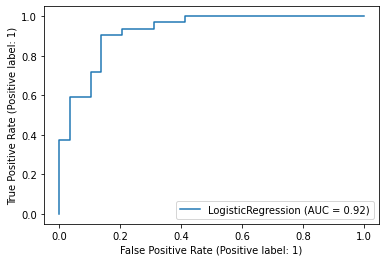

In [132]:
RocCurveDisplay.from_estimator(model, X_test, y_test)



#### Confusion matrix


[[25  4]
 [ 3 29]]


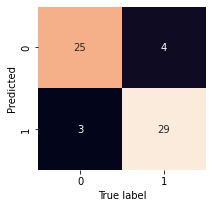

In [133]:
print(confusion_matrix(y_test, y_pred))


def plot_confusion_matrix(y_test, y_pred):
    """
    Plot confusion_matrix using seaborn
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted')


plot_confusion_matrix(y_test, y_pred)
 


In [134]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Evalutaion matrix using cross validation

In [138]:
# Cross-validated accuracy

cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(cv_acc.mean())

print(model.score(X_test, y_test))

0.8479781420765027
0.8524590163934426


In [35]:
# Cross-validated precision

cv_prec = cross_val_score(model, X, y, cv=5, scoring='precision')
print(cv_prec.mean())


# Cross-validated accuracy

cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
print(cv_recall.mean())


# Cross-validated accuracy

cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
print(cv_f1.mean())

0.8215873015873015
0.9272727272727274
0.8705403543192143


### Features important

<AxesSubplot:>

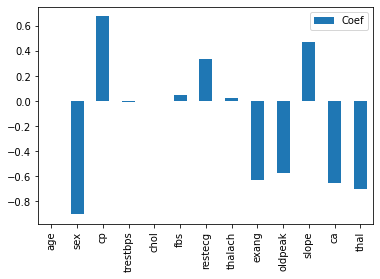

In [50]:
from sklearn.feature_selection import SelectFromModel


feature_dictionary = dict(zip(df.columns, model.coef_[0]))
feature_dictionary
feature_dictionary_dataframe = pd.DataFrame(feature_dictionary, index=['Coef'])
feature_dictionary_dataframe.T.plot.bar()

In [53]:
df.var()/len(df)

age         0.272226
sex         0.000717
cp          0.003515
trestbps    1.015137
chol        8.866095
fbs         0.000419
restecg     0.000913
thalach     1.731506
exang       0.000728
oldpeak     0.004449
slope       0.001253
ca          0.003451
thal        0.001237
target      0.000821
dtype: float64

In [137]:
np.random.seed(42)
filter_model= SelectFromModel(model, max_features=12)
filter_model.fit(X,y)
X_filted = filter_model.transform(X)
feature_names = np.array(X.columns)[filter_model.get_support()]
X_filted_values = filter_model.transform(X)
X_filted = pd.DataFrame(X_filted_values, columns =feature_names, index=None)
X_filted
X_train, X_test, y_train, y_test = train_test_split(X_filted,  y, test_size =0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

## 7. Experimentation

* Could we collect more data?
* Could we try a better model?
* Could you improve the current model?
* If our model is good enough, how can we export it and share it with other people?